# Predicting Sales with Temperature - TensorFlow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
data= pd.read_csv("../DATA/SalesData (1).csv")
data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Revenue'}>]], dtype=object)

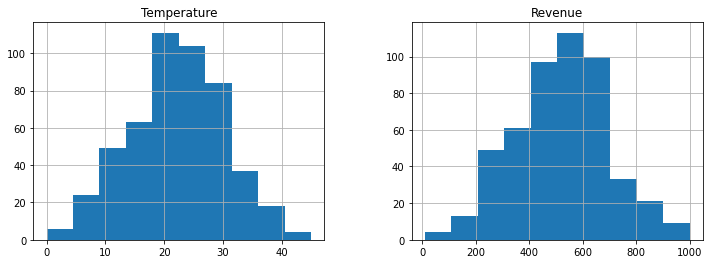

In [4]:
data.hist(figsize=(12,4))

<AxesSubplot:xlabel='Temperature', ylabel='Revenue'>

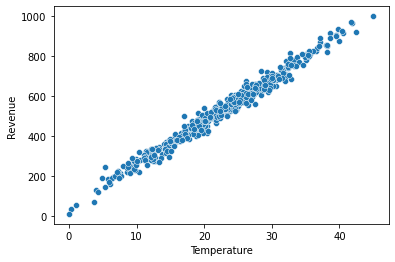

In [5]:
sns.scatterplot(x='Temperature', y='Revenue', data= data)

In [6]:
x= data[["Temperature"]]
y= data["Revenue"]

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=42)

In [8]:
tf.random.set_seed(42)

model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, input_shape = [1]))

model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
callback1= keras.callbacks.EarlyStopping(monitor="loss", patience=10, min_delta=0.1, mode="min")
epochs_hist = model.fit(x_train, y_train, epochs = 1000, callbacks=[callback1])

Epoch 1/1000
12/12 [==============================] - 0s 833us/step - loss: 273503.3438
Epoch 2/1000
12/12 [==============================] - 0s 1000us/step - loss: 243971.0312
Epoch 3/1000
12/12 [==============================] - 0s 1000us/step - loss: 216282.7969
Epoch 4/1000
12/12 [==============================] - 0s 916us/step - loss: 191268.9062
Epoch 5/1000
12/12 [==============================] - 0s 999us/step - loss: 168331.9844
Epoch 6/1000
12/12 [==============================] - 0s 834us/step - loss: 147637.2969
Epoch 7/1000
12/12 [==============================] - 0s 833us/step - loss: 128708.1094
Epoch 8/1000
12/12 [==============================] - 0s 917us/step - loss: 111984.2656
Epoch 9/1000
12/12 [==============================] - 0s 833us/step - loss: 97021.3438
Epoch 10/1000
12/12 [==============================] - 0s 1000us/step - loss: 83612.2969
Epoch 11/1000
12/12 [==============================] - 0s 1000us/step - loss: 71791.0391
Epoch 12/1000
12/12 [========

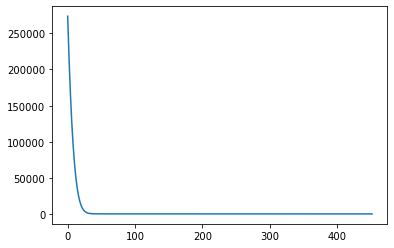

In [10]:
plt.plot(epochs_hist.history["loss"])

In [11]:
preds= model.predict(x_test)

In [12]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 1000us/step - loss: 611.2440


611.2439575195312

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

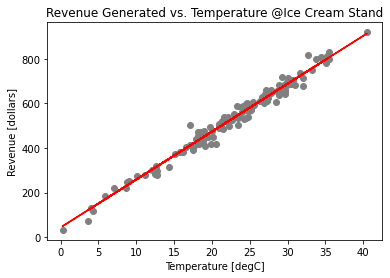

In [13]:
plt.scatter(x_test, y_test, color = 'gray')
plt.plot(x_test, model.predict(x_test), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')

In [14]:
from sklearn.metrics import r2_score

preds= model.predict(x_test)
r2_score(y_test, preds)

0.9777976779447275

In [15]:
# Use the trained model to perform predictions


Temp = 5
Revenue = model.predict([Temp])
print('Revenue Predictions Using Trained ANN =', Revenue)

Revenue Predictions Using Trained ANN = [[150.79286]]


## Normalizing and training with the same model

In [16]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [17]:
tf.random.set_seed(42)

model2 = keras.Sequential()
model2.add(keras.layers.Dense(units = 1, input_shape = [1]))

model2.compile(optimizer=tf.keras.optimizers.SGD(0.01), loss = 'mean_squared_error')

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [18]:
callback1= keras.callbacks.EarlyStopping(monitor="loss", patience=10, min_delta=0.1, mode="min")
epochs_hist = model2.fit(x_train, y_train, epochs = 1000, callbacks=[callback1])

Epoch 1/1000
12/12 [==============================] - 0s 917us/step - loss: 245223.2969
Epoch 2/1000
12/12 [==============================] - 0s 917us/step - loss: 151461.3281
Epoch 3/1000
12/12 [==============================] - 0s 1000us/step - loss: 93435.3047
Epoch 4/1000
12/12 [==============================] - 0s 917us/step - loss: 57655.7930
Epoch 5/1000
12/12 [==============================] - 0s 917us/step - loss: 35690.1797
Epoch 6/1000
12/12 [==============================] - 0s 918us/step - loss: 22243.0996
Epoch 7/1000
12/12 [==============================] - 0s 917us/step - loss: 13952.2070
Epoch 8/1000
12/12 [==============================] - 0s 916us/step - loss: 8835.3770
Epoch 9/1000
12/12 [==============================] - 0s 1000us/step - loss: 5684.5107
Epoch 10/1000
12/12 [==============================] - 0s 1ms/step - loss: 3748.1626
Epoch 11/1000
12/12 [==============================] - 0s 916us/step - loss: 2555.2441
Epoch 12/1000
12/12 [======================

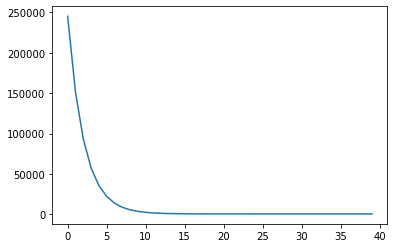

In [19]:
plt.plot(epochs_hist.history["loss"])

In [20]:
model2.evaluate(x_test,y_test)

4/4 [==============================] - 0s 1ms/step - loss: 618.4235


618.4235229492188

In [21]:
from sklearn.metrics import r2_score

preds= model2.predict(x_test)
r2_score(y_test, preds)

0.9775368914573492